# California Housing Price Prediction #

## **Project 1**

## **DESCRIPTION** 

## **Background of Problem Statement :**

The US Census Bureau has published California Census Data which has 10 types of metrics such as the population, median income, median housing price, and so on for each block group in California. The dataset also serves as an input for project scoping and tries to specify the functional and nonfunctional requirements for it.

## **Problem Objective :**

The project aims at building a model of housing prices to predict median house values in California using the provided dataset. This model should learn from the data and be able to predict the median housing price in any district, given all the other metrics.
Districts or block groups are the smallest geographical units for which the US Census Bureau
publishes sample data (a block group typically has a population of 600 to 3,000 people). There are 20,640 districts in the project dataset.

## **Domain:** Finance and Housing 
 
## **Submitted By:** Kritika Tagare





In [18]:
# Importing all the required library

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
# Read the "hosing.csv" file from the folder into the program
house = pd.read_excel('1553768847_housing.xlsx')

In [20]:
# Print first few rows of this data
house.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [21]:
house.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [22]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [23]:
house.shape

(20640, 10)

In [24]:
# Handle missing values
house.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

In [25]:
house.mean()

longitude               -119.569704
latitude                  35.631861
housing_median_age        28.639486
total_rooms             2635.763081
total_bedrooms           537.870553
population              1425.476744
households               499.539680
median_income              3.870671
median_house_value    206855.816909
dtype: float64

In [26]:
house_df=house.fillna(537.870553)

In [27]:
house_df.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
median_house_value    0
dtype: int64

In [28]:
# Encode categorical data 
house_df=pd.get_dummies(data=house_df,columns=['ocean_proximity'],drop_first=False)

In [29]:
house_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,0,0,0,1,0
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,0,0,0,1,0
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,0,0,0,1,0
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,0,0,0,1,0
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,78100,0,1,0,0,0
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,77100,0,1,0,0,0
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,92300,0,1,0,0,0
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,84700,0,1,0,0,0


In [44]:
titles=list(house_df.columns)

In [45]:
titles

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'median_house_value',
 'ocean_proximity_INLAND',
 'ocean_proximity_ISLAND',
 'ocean_proximity_NEAR BAY',
 'ocean_proximity_NEAR OCEAN']

In [47]:
titles[0],titles[8]= titles[8],titles[0]

In [48]:
titles

['median_house_value',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'longitude',
 'ocean_proximity_INLAND',
 'ocean_proximity_ISLAND',
 'ocean_proximity_NEAR BAY',
 'ocean_proximity_NEAR OCEAN']

In [50]:
house_df=house_df[titles]

In [51]:
house_df

,median_house_value,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,longitude,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,452600,37.88,41,880,129.0,322,126,8.3252,-122.23,0,0,1,0
1,358500,37.86,21,7099,1106.0,2401,1138,8.3014,-122.22,0,0,1,0
2,352100,37.85,52,1467,190.0,496,177,7.2574,-122.24,0,0,1,0
3,341300,37.85,52,1274,235.0,558,219,5.6431,-122.25,0,0,1,0
4,342200,37.85,52,1627,280.0,565,259,3.8462,-122.25,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,78100,39.48,25,1665,374.0,845,330,1.5603,-121.09,1,0,0,0
20636,77100,39.49,18,697,150.0,356,114,2.5568,-121.21,1,0,0,0
20637,92300,39.43,17,2254,485.0,1007,433,1.7000,-121.22,1,0,0,0
20638,84700,39.43,18,1860,409.0,741,349,1.8672,-121.32,1,0,0,0


In [52]:
# Extract input (X) and output (Y) data from the dataset
x= house_df.iloc[:,1:]
y= house_df.median_house_value

In [53]:
# Split the data into 80% training dataset and 20% test dataset
from sklearn.model_selection import train_test_split

In [54]:
x_train, x_test, y_train, y_test=train_test_split(x,y,random_state=0)

In [55]:
house_df.head()

,median_house_value,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,longitude,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,452600,37.88,41,880,129.0,322,126,8.3252,-122.23,0,0,1,0
1,358500,37.86,21,7099,1106.0,2401,1138,8.3014,-122.22,0,0,1,0
2,352100,37.85,52,1467,190.0,496,177,7.2574,-122.24,0,0,1,0
3,341300,37.85,52,1274,235.0,558,219,5.6431,-122.25,0,0,1,0
4,342200,37.85,52,1627,280.0,565,259,3.8462,-122.25,0,0,1,0


In [56]:
# Standardize training and test datasets
from sklearn.preprocessing import StandardScaler

In [57]:
# Create an estimator object for scaler
stdSc= StandardScaler()

In [58]:
stdSc.fit(x_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [59]:
x_train_std=stdSc.transform(x_train)

In [60]:
x_test_std=stdSc.transform(x_test)

In [61]:
pd.DataFrame(x_train_std)

,0,1,2,3,4,5,6,7,8,9,10,11
0,1.324919,-0.764262,1.068091,0.412186,0.436631,0.327101,1.808122,-1.552206,-0.679323,-0.013923,-0.353669,-0.386732
1,-1.252070,-0.843631,-0.480400,-0.641939,-0.768275,-0.670119,1.097891,1.159540,-0.679323,-0.013923,-0.353669,2.585768
2,-0.442961,-0.764262,-0.955697,-0.972692,-0.971859,-1.027760,-0.349490,0.646103,1.472053,-0.013923,-0.353669,-0.386732
3,-0.990162,-1.240475,-1.084700,-1.179710,-1.141367,-1.194834,1.645924,1.189449,-0.679323,-0.013923,-0.353669,-0.386732
4,1.399750,-0.605525,0.283095,0.535921,0.269744,0.616870,-0.717009,-0.919133,1.472053,-0.013923,-0.353669,-0.386732
...,...,...,...,...,...,...,...,...,...,...,...,...
15475,1.236058,-0.684894,-0.607115,-0.734740,-0.624105,-0.732771,0.283891,-0.844361,1.472053,-0.013923,-0.353669,-0.386732
15476,0.866580,-0.129313,-0.696777,-0.815644,-0.680899,-0.758876,-0.507307,-0.659922,1.472053,-0.013923,-0.353669,-0.386732
15477,0.445656,0.188162,-0.553593,0.000222,-0.631095,-0.278540,-0.357302,-1.163390,-0.679323,-0.013923,-0.353669,2.585768
15478,-0.938716,0.426268,-0.236118,-0.094650,-0.327029,-0.082751,0.927301,0.815587,-0.679323,-0.013923,-0.353669,-0.386732


In [62]:
# Building Model
from sklearn.linear_model import LinearRegression

In [63]:
regModel=LinearRegression()

In [64]:
regModel.fit(x_train_std,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [65]:
regModel.score(x_train_std,y_train)

0.6475931930644808

In [66]:
regModel.score(x_test_std,y_test)

0.6384081651709086

In [67]:
# Extract just the median_income column from the independent variables 
pd.DataFrame(house_df.median_income)

,median_income
0,8.3252
1,8.3014
2,7.2574
3,5.6431
4,3.8462
...,...
20635,1.5603
20636,2.5568
20637,1.7000
20638,1.8672


In [68]:
house_df.median_income

0        8.3252
1        8.3014
2        7.2574
3        5.6431
4        3.8462
          ...  
20635    1.5603
20636    2.5568
20637    1.7000
20638    1.8672
20639    2.3886
Name: median_income, Length: 20640, dtype: float64

In [69]:
# Perform Linear Regression to predict housing values based on median_income
x=pd.DataFrame(house_df.median_income)
y=pd.DataFrame(house_df.median_house_value)

In [70]:
# Building Model
from sklearn.linear_model import LinearRegression

In [71]:
regModel=LinearRegression()

In [72]:
regModel.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [73]:
regModel.score(x,y)

0.47344749180719903

In [81]:
# Predict output for test dataset using the fitted model
est1=regModel.predict(x)

Exception: Data must be 1-dimensional

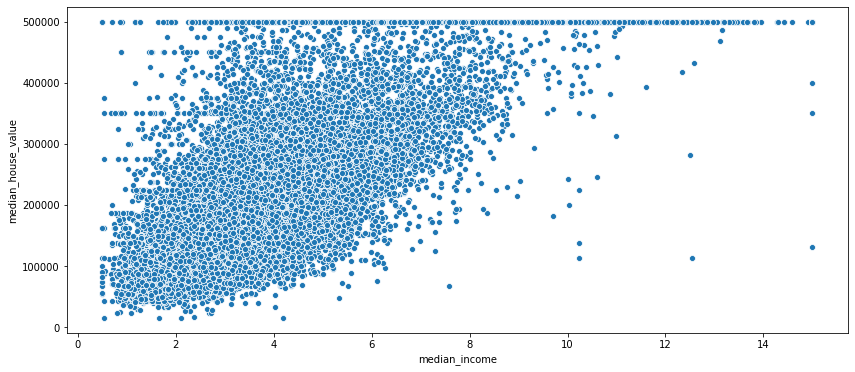

In [82]:
plt.figure(figsize=(14,6))
sns.scatterplot(x=house_df.median_income,y=house_df.median_house_value)
sns.scatterplot(x=house_df.median_income,y=est1)
plt.show()
